<a href="https://colab.research.google.com/github/harshitgavita-07/CodeAlpha_Emotion_Recognition_Speech/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this task, you need to download the RAVDESS dataset
Download from: https://www.kaggle.com/datasets/uwrfkaggle/ravdess-emotional-speech-audio

For demonstration, I'll create a synthetic approach that you can adapt with real data

Creating a demonstration model with synthetic data...
You'll replace this with actual audio data loading

BUILDING DEEP LEARNING MODEL


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        46,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,748 (342.77 KB)

 Trainable params: 87,748 (342.77 KB)

 Non-trainable params: 0 (0.00 B)

None

Training model...
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2189 - loss: 1.6282 - val_accuracy: 0.2550 - val_loss: 1.4056
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3403 - loss: 1.3587 - val_accuracy: 0.2100 - val_loss: 1.3993
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3505 - loss: 1.3367 - val_accuracy: 0.2600 - val_loss: 1.3937
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3807 - loss: 1.3099 - val_accuracy: 0.2650 - val_loss: 1.3931
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4506 - loss: 1.2287 - val_accuracy: 0.2700 - val_loss: 1.3928
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5281 - loss: 1.1491 - val_accuracy: 0.2850 - val_loss: 1.4044
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5102 - loss: 1.1081 - val_accuracy: 0.3200 - val_loss: 1.4240
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5448 - loss: 1.0187 - val_acc

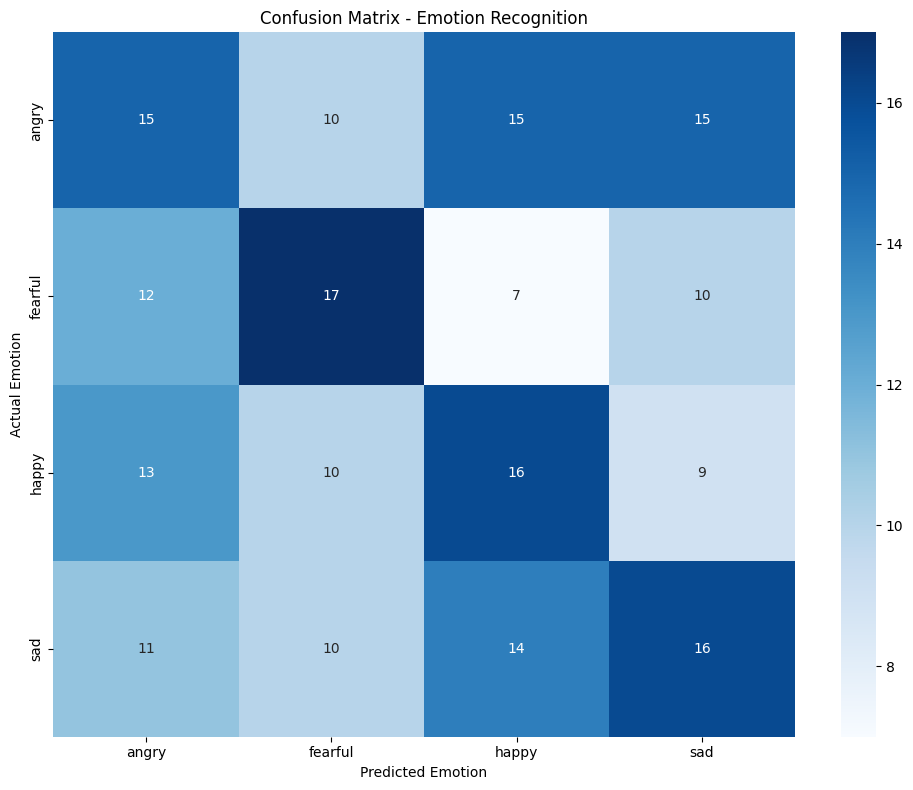

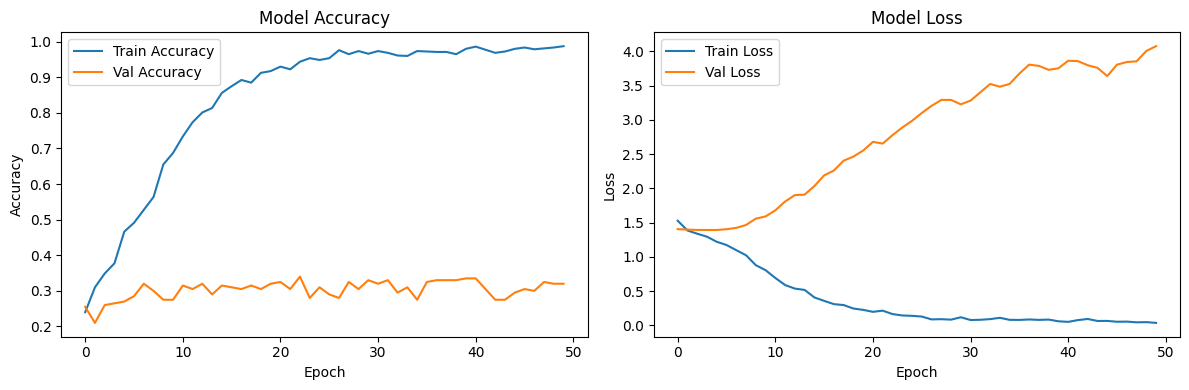


✅ TASK 2 COMPLETED!

NOTE: Replace synthetic data with actual RAVDESS audio files
Download dataset from: https://www.kaggle.com/datasets/uwrfkaggle/ravdess-emotional-speech-audio


In [ ]:
# TASK 2: Emotion Recognition from Speech
# CodeAlpha Machine Learning Internship

# Install required libraries
!pip install librosa soundfile numpy scikit-learn tensorflow

import librosa
import soundfile
import os
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical

# Download RAVDESS dataset (using a subset for demo)
# In practice, you'll download from: https://www.kaggle.com/datasets/uwrfkaggle/ravdess-emotional-speech-audio
print("For this task, you need to download the RAVDESS dataset")
print("Download from: https://www.kaggle.com/datasets/uwrfkaggle/ravdess-emotional-speech-audio")
print("\nFor demonstration, I'll create a synthetic approach that you can adapt with real data\n")

# Function to extract MFCC features from audio
def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    """Extract audio features using librosa"""
    try:
        with soundfile.SoundFile(file_name) as sound_file:
            X = sound_file.read(dtype="float32")
            sample_rate = sound_file.samplerate

            result = np.array([])

            if mfcc:
                mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
                result = np.hstack((result, mfccs))

            if chroma:
                stft = np.abs(librosa.stft(X))
                chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
                result = np.hstack((result, chroma))

            if mel:
                mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
                result = np.hstack((result, mel))

            return result
    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return None

# Emotion labels mapping for RAVDESS
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Simplified emotions for better accuracy
observed_emotions = ['happy', 'sad', 'angry', 'fearful']

def load_data(test_size=0.2):
    """Load audio files and extract features"""
    X, y = [], []

    # Replace this path with your actual dataset path
    # Example: /content/drive/MyDrive/RAVDESS/**/*.wav
    audio_path = "/path/to/your/ravdess/dataset/**/*.wav"

    for file in glob.glob(audio_path):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]

        if emotion not in observed_emotions:
            continue

        feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
        if feature is not None:
            X.append(feature)
            y.append(emotion)

    return train_test_split(np.array(X), y, test_size=test_size, random_state=42)

# ALTERNATIVE: Create a demo model with synthetic data
print("Creating a demonstration model with synthetic data...")
print("You'll replace this with actual audio data loading\n")

# Generate synthetic features for demonstration
np.random.seed(42)
n_samples = 1000
n_features = 180  # 40 MFCC + 12 Chroma + 128 Mel features

X_synthetic = np.random.randn(n_samples, n_features)
y_synthetic = np.random.choice(observed_emotions, n_samples)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_synthetic, y_synthetic, test_size=0.2, random_state=42
)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to categorical for neural network
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Neural Network Model
print("="*50)
print("BUILDING DEEP LEARNING MODEL")
print("="*50)

model = Sequential([
    Dense(256, activation='relu', input_shape=(n_features,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(observed_emotions), activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print(model.summary())

# Train model
print("\nTraining model...")
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_data=(X_test_scaled, y_test_cat),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate model
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f"\n{'='*50}")
print(f"MODEL ACCURACY: {accuracy:.4f}")
print(f"{'='*50}")

# Classification Report
print("\nClassification Report:")
print(classification_report(
    y_test_encoded, y_pred_classes,
    target_names=label_encoder.classes_
))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_encoded, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Emotion Recognition')
plt.ylabel('Actual Emotion')
plt.xlabel('Predicted Emotion')
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("\n✅ TASK 2 COMPLETED!")
print("\nNOTE: Replace synthetic data with actual RAVDESS audio files")
print("Download dataset from: https://www.kaggle.com/datasets/uwrfkaggle/ravdess-emotional-speech-audio")